In [ ]:
from datasets.kitti_loader import KITTILoader

image_num = '0001'

kframes = KITTILoader.load_labelled_frames('/home/ray/Data/KITTI/training/image_02/'+image_num,'/home/ray/Data/KITTI/training/label_02/'+image_num+'.txt')

Num crop objs in sample: 9
targets shape (9, 4)
data shape (9, 3, 200, 150)


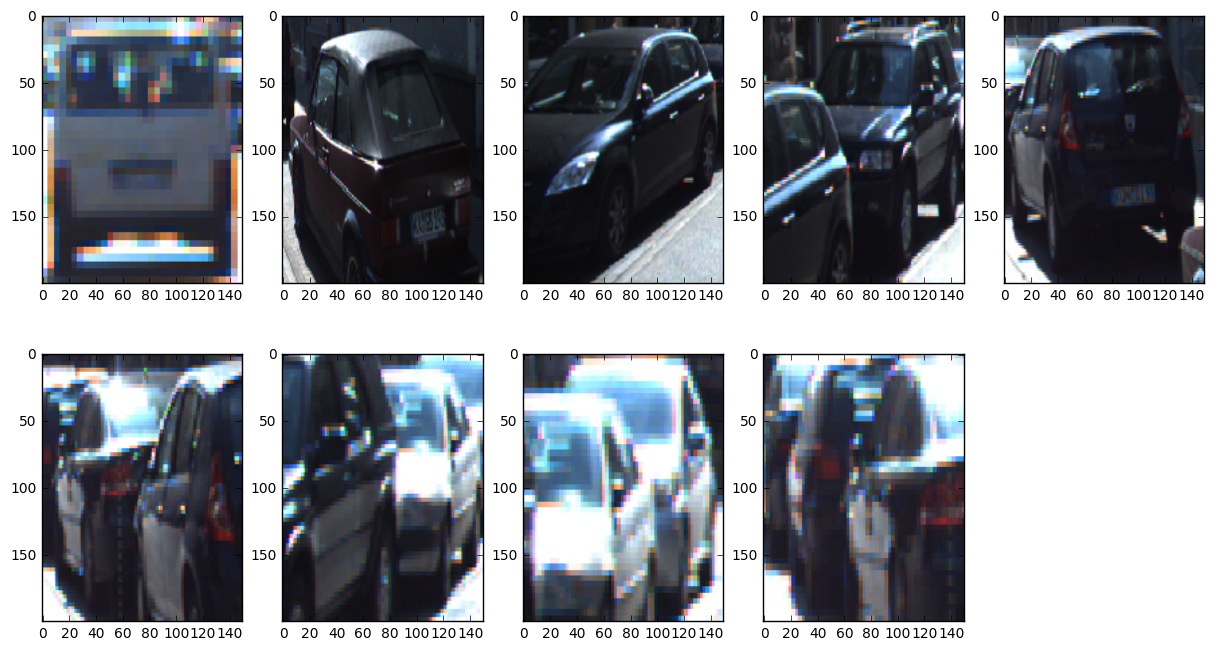

In [1]:
from data_loading.sources.kitti_source import KITTISource
from data_loading.transformers.crop_transformer import CropTransformer
from image.visualization import tensor_to_pil_image_array,visualize_pil_array
%matplotlib inline
ks = KITTISource('../Data/KITTI/training',max_frames=200)
ct = CropTransformer(crop_size=[150,200],obj_types=['Car','Van'])
sample = ct.transform([ks.frames[1]])
pil_arr = tensor_to_pil_image_array(sample.data)
visualize_pil_array(pil_arr)

torch.Size([9, 3, 200, 150])


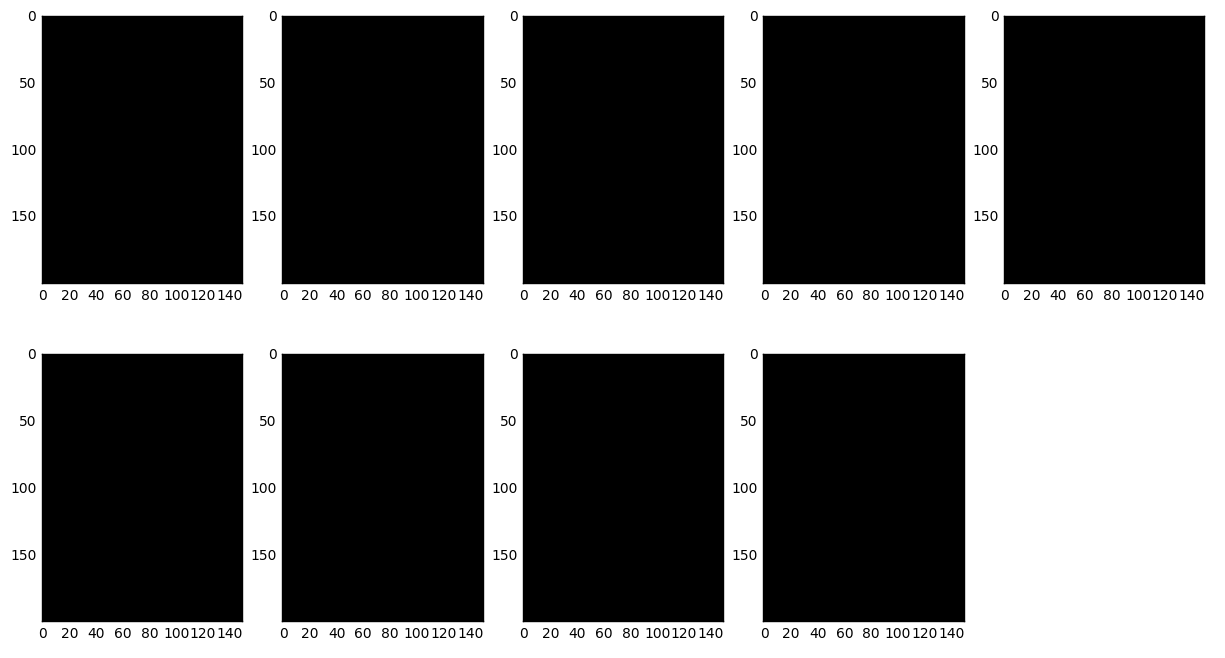

In [5]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from networks.conv_stack import ConvolutionStack as CS
cs = CS(3)
cs.append(3,3,1)
cs.append(3,3,1)
cs.append(6,3,1)
v = Variable(sample.data)
from networks.autoencoder import AutoEncoder
AE = AutoEncoder()
output = AE.forward(v)
print output.size()
output.type
pil_arr = tensor_to_pil_image_array(output.data)
visualize_pil_array(pil_arr)

In [ ]:
sample.data.size()

In [ ]:
# kwargs = {}
# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../Data/mnist', train=True, download=True,
#                    transform=transforms.ToTensor()),
#     batch_size=1, shuffle=True, **kwargs)
# for batch_idx, (data, _) in enumerate(train_loader):
#     print data.size()

In [ ]:
frame = 10
ks.frames[frame].load_image()
# print ks.frames[0].image
ks.frames[frame].show_image()

In [ ]:
import numpy as np
x = ks.frames[10].image
y = np.asarray(x)
print y.shape
np.transpose(y,axes=(2,0,1)).shape

In [ ]:
im = ks.frames[0].image.crop((100,100,150,150))
im.resize((100,100))


In [ ]:
'{0},{1}'.format('one','two')

In [ ]:
from image.affine import Affine
import numpy as np
x = Affine()
x.append(Affine.scaling(10,10))
x.append(Affine.translation(11,11))
print x.transform
c = np.array([[5,2],[5,2],[1,1]])
print c.T
y = x.apply_to_coords(c)
print y
# x.unapplyToCoords(y)



In [ ]:
from utils.memory import Memory
m = Memory()
m.resident()

In [ ]:
torch.Tensor(np.array([[4,2],[5,6]]))

In [ ]:
import numpy as np
c = np.array([[5,2],[5,2],[1,1]])
c.shape

In [ ]:

for i,x in enumerate(trainloader):
    b = x
    if i>1:
        break
npb = b[0].numpy()
npb.flags['C_CONTIGUOUS']
npb.shape